# Prediction of mobile phone prices using Linear Regression

## 1. Introduction

In the rapidly evolving world of technology and devices, price is a major factor in determining what consumers choose to buy. In order to estimate the price of mobile phones, only key features— which are elaborated and explained in later sections —would be used. This is important because it helps not only consumers but also stakeholders in understanding the factors that affect mobile phone prices.

### 1.1 Objectives
- Estimate mobile phone prices based on the relevant key features
- Determine and analyze the effects of various factors that affect their pricing
- Provide insights into the relationship between said key features and its prices

### 1.2 Justification for Linear Regression
This project is a good fit for linear regression because of its interpretability. Given the linear components in the correlations between the features of the mobile phone and its price, linear regression is a suitable option. Furthermore, linear regression allows me to quantify each feature's effect on the target varaible, which offers valuable insights into pricing dynamics.

### 1.3 Potential Contributions
This project contributes to the field by:
1. Providing a predictive model for gauging the price of mobile phones based on its key features.
2. Identifying the role that specific features play, in determining the cost of mobile phones.
3. Giving manufacturers, merchants, and consumers insightful information to help them make wise choices in the mobile phone market.

My goal in this project is to broaden knowledge about the variables influencing mobile phone prices so that consumers may make better choices in a competitive and ever-changing market.

## 2. Dataset Description

### 2.1 Source and collection
The dataset for this project was sourced from Kaggle, which is cited under references section below. The dataset has information on the name, brand, model, and price of the mobile phones, along with its technical specifications. 

### 2.2 Size and Structure
The 1359 instances have each row representing a unique mobile phone record. Its 21 attributes include `Name`, `Brand`, `Model`, `Battery capacity (mAh)`, `Screen size (inches)`, `Touchscreen`, `Resolution x`, `Resolution y`, `Processor`, `RAM (MB)`, `Internal storage (GB)`, `Rear camera`, `Front camera`, `Operating system`, `Wi-Fi`, `Bluetooth`, `GPS`, `Number of SIMs`, `3G`, `4G/LTE`, and `Price`. The data is strucutred in a tabular format with rows and columns, in a CSV file.

### 2.3 Data types
The dataset has String, Integer, and Float data types. <br>

Columns with String data type are:
- `Name` : Name of the phone
- `Brand` : Brand of the phone
- `Model` : Model of the phone
- `Touchscreen` : Whether the phone is touchscreen supported [Yes/No] 
- `Operating system` : OS of the phone [Yes/No]
- `Wi-Fi` : Whether the phone has a Wi-Fi function [Yes/No]
- `Bluetooth` : Whether the phone has a Bluetooth function [Yes/No]
- `GPS` : Whether the phone has a GPS function [Yes/No]
- `3G` : Whether the phone has a 3G cellular function [Yes/No]
- `4G/LTE` : Whether the phone has a 4G/LTE cellular function [Yes/No]

Columns with Integer or Float data types are:
- `Battery capacity (mAh)` : Battery capacity of the phone in mAh [Integer]
- `Screen size (inches)` : Diagonal length of the phone in inches [Float]
- `Resolution x` : Number of pixels in horizontal direction of the phone [Integer]
- `Resolution y`: Number of pixels in vertical direction of the phone [Integer]
- `Processor` : Number of processor cores the phone has [Integer]
- `RAM (MB)` : Available RAM of the phone in MB [Integer]
- `Internal storage (GB)` : Internal storage of the phone in GB [Float]
- `Rear camera` : Resolution of rear camera in MP [Float]
- `Front camera` : Resolution of front camera in MP [Float]
- `Number of SIMs` : Available SIM card slots in the phone [Integer]
- `Price` : Price of the phone in Indian Rupee (INR) [Integer]

### 2.4 Suitability for Linear Regression
The chosen dataset is suitable for linear regression analysis because it offers a diverse range of both categorical and numerical features that possibly influence the pricing of a mobile phone. The target variable `Price` is numerical, which aligns with the requirements for regression analysis. The structure of the dataset also allows for exploring the linear relationships between its features and the said target variable.

## 3. Data Preprocessing

### 3.1 Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3.2 Reading and exploring the data

In [2]:
df = pd.read_csv("ndtv_data_final.csv")

#### 3.2.1 Brief descriptive statistics

In [3]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Name,OnePlus 7T Pro McLaren Edition,Realme X2 Pro,iPhone 11 Pro Max,iPhone 11,LG G8X ThinQ
Brand,OnePlus,Realme,Apple,Apple,LG
Model,7T Pro McLaren Edition,X2 Pro,iPhone 11 Pro Max,iPhone 11,G8X ThinQ
Battery capacity (mAh),4085,4000,3969,3110,4000
Screen size (inches),6.67,6.5,6.5,6.1,6.4
Touchscreen,Yes,Yes,Yes,Yes,Yes
Resolution x,1440,1080,1242,828,1080
Resolution y,3120,2400,2688,1792,2340
Processor,8,8,6,6,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [5]:
df.describe()

,Unnamed: 0,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,679.000000,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,392.453819,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,0.000000,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,339.500000,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,679.000000,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,1018.500000,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,1358.000000,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


### 3.3 Data cleaning

#### 3.3.1 Dropping and renaming columns

The column `Unnamed: 0` will be dropped because it is just the running number to the rows in the CSV file.

In [6]:
df = df.drop('Unnamed: 0', axis=1)
df.head().T

,0,1,2,3,4
Name,OnePlus 7T Pro McLaren Edition,Realme X2 Pro,iPhone 11 Pro Max,iPhone 11,LG G8X ThinQ
Brand,OnePlus,Realme,Apple,Apple,LG
Model,7T Pro McLaren Edition,X2 Pro,iPhone 11 Pro Max,iPhone 11,G8X ThinQ
Battery capacity (mAh),4085,4000,3969,3110,4000
Screen size (inches),6.67,6.5,6.5,6.1,6.4
Touchscreen,Yes,Yes,Yes,Yes,Yes
Resolution x,1440,1080,1242,828,1080
Resolution y,3120,2400,2688,1792,2340
Processor,8,8,6,6,8
RAM (MB),12000,6000,4000,4000,6000


In [7]:
df.columns

Index(['Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')

For readability and clarity, I will be renaming the columns in the dataframe.

In [8]:
newColumnNames = {
    'Screen size (inches)': 'Screen size (in)',
    'Touchscreen': 'Touchscreen display',
    'Resolution x': 'Screen resolution (X)',
    'Resolution y': 'Screen resolution (Y)',
    'Processor':  'Processor cores',
    'Rear camera': 'Rear camera (MP)',
    'Front camera': 'Front camera (MP)',
    'Operating system': 'OS',
    'Wi-Fi': 'Wi-Fi support',
    'Bluetooth': 'Bluetooth support',
    'GPS': 'GPS support',
    'Number of SIMs': 'SIM Card Slots',
    '3G': '3G support',
    '4G/ LTE': '4G/LTE support',
}

df.rename(columns=newColumnNames, inplace=True)
df.columns

Index(['Name', 'Brand', 'Model', 'Battery capacity (mAh)', 'Screen size (in)',
       'Touchscreen display', 'Screen resolution (X)', 'Screen resolution (Y)',
       'Processor cores', 'RAM (MB)', 'Internal storage (GB)',
       'Rear camera (MP)', 'Front camera (MP)', 'OS', 'Wi-Fi support',
       'Bluetooth support', 'GPS support', 'SIM Card Slots', '3G support',
       '4G/LTE support', 'Price'],
      dtype='object')

#### 3.2 Mapping categorical columns to binary output

Since the following columns have 'Yes' or 'No' values in them, it is more efficient to have their data types consistent to the numerical columns so that it would be easier to have them fitted into the Linear Regression model in the later sections. <br>
The categorical columns to map include:
`Touchscreen display`, `Wi-Fi support`, `Bluetooth support`, `GPS support`, `3G support`, `4G/LTE support'`.

In [9]:
mapping = {"Yes": 1, "No": 0}
for column in ['Touchscreen display', 'Wi-Fi support', 'Bluetooth support', 'GPS support', '3G support', '4G/LTE support']:
    df[column] = df[column].map(mapping)

print(df.dtypes)
df.head()

Name                       object
Brand                      object
Model                      object
Battery capacity (mAh)      int64
Screen size (in)          float64
Touchscreen display         int64
Screen resolution (X)       int64
Screen resolution (Y)       int64
Processor cores             int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera (MP)          float64
Front camera (MP)         float64
OS                         object
Wi-Fi support               int64
Bluetooth support           int64
GPS support                 int64
SIM Card Slots              int64
3G support                  int64
4G/LTE support              int64
Price                       int64
dtype: object


,Name,Brand,Model,Battery capacity (mAh),Screen size (in),Touchscreen display,Screen resolution (X),Screen resolution (Y),Processor cores,RAM (MB),...,Rear camera (MP),Front camera (MP),OS,Wi-Fi support,Bluetooth support,GPS support,SIM Card Slots,3G support,4G/LTE support,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,1,1440,3120,8,12000,...,48.0,16.0,Android,1,1,1,2,1,1,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,1,1080,2400,8,6000,...,64.0,16.0,Android,1,1,1,2,1,1,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,1,1242,2688,6,4000,...,12.0,12.0,iOS,1,1,1,2,1,1,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,1,828,1792,6,4000,...,12.0,12.0,iOS,1,1,1,2,1,1,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,1,1080,2340,8,6000,...,12.0,32.0,Android,1,1,1,1,0,0,49990


#### 3.3.3 Splitting dataframe into numerical and categorical columns

To streamline the analysis in Sections 4 and 5, I split the dataframe into numerical and categorical columns.

In [10]:
numericalColumns = ['Battery capacity (mAh)', 'Screen size (in)', 'Screen resolution (X)', 'Screen resolution (Y)', 'Processor cores', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera (MP)', 'Front camera (MP)', 'SIM Card Slots', 'Price']
categoricalColumns = ['Touchscreen display', 'Wi-Fi support', 'Bluetooth support', 'GPS support', '3G support', '4G/LTE support']

In [11]:
print("Numerical columns are: ", numericalColumns)
print("Categorical columns are: ", categoricalColumns)

Numerical columns are:  ['Battery capacity (mAh)', 'Screen size (in)', 'Screen resolution (X)', 'Screen resolution (Y)', 'Processor cores', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera (MP)', 'Front camera (MP)', 'SIM Card Slots', 'Price']
Categorical columns are:  ['Touchscreen display', 'Wi-Fi support', 'Bluetooth support', 'GPS support', '3G support', '4G/LTE support']


## 4. Statistical Analysis and Data visualization

### 4.1 Numerical columns analysis

#### 4.1.1 Performing descriptive statistics on numerical columns

Since the `mean` and `standard deviation` were covered in Section 3.2.1, `df.describe()`, I will only be covering `median` value, `skewness`, and `kurtosis`.

In [12]:
dfStats = pd.DataFrame(columns=['Median', 'Skewness', 'Kurtosis'])

for column in numericalColumns:
    medianValue = df[column].median()
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()

    dfStats.loc[column] = [medianValue, skewness, kurtosis]

dfStats

,Median,Skewness,Kurtosis
Battery capacity (mAh),3000.0,0.486553,-0.103131
Screen size (in),5.2,-0.320639,0.944272
Screen resolution (X),720.0,0.723081,0.526228
Screen resolution (Y),1280.0,0.654431,0.117946
Processor cores,4.0,0.008903,-1.385759
RAM (MB),2000.0,1.574147,4.058157
Internal storage (GB),16.0,4.065380,30.106092
Rear camera (MP),12.2,3.655455,19.886244
Front camera (MP),5.0,2.016150,5.193820
SIM Card Slots,2.0,-1.752184,1.221014


<b>Insights</b> <br>
1. <u>Battery capacity (mAh):</u>
- With a median of 3000 mAh, it suggest that most mobile phones have a battery capacity of around 3000 mAh.
- 0.487 is a slight positive skewness that indicates there are more mobile phones with lower battery capacities than mobile phones with higeher capacities. But since the skewness value is not very high, the distribution is rather symmetrical.
- As for its kurtosis of -0.103, shows that there are fewer outliers.

2. <u>Screen size (in)</u>
- 5.2 inches is the median screen size, suggesting that most mobile phones have screen size of around 5.2 inches.
- -0.321 is a slight negative skewness that indicates there are more mobile phones with larger screen sizes than mobile phones with smaller screen sizes. Similar to Battery capacity (mAh), the skewness value is not very high, therefore the distribution is also rather symmetrical.
- With a positive kurtosis of 0.944, it shows that the distribution has heavier tails compared to normal distribution, meaning there are a lot of outliers at the extremes of the distribution.

3. <u>Screen resolution (X)<u>
- 720 pixels is the median screen resolution for the horizontal direction of the mobile phone, this suggests that most mobile phones have a screen resolution of around 720 pixels horizontally.
- 0.723 is its skewness, which indicates there are more phones with lower resolutions than phones with higher resolutions.
- A positive kurtosis of 0.526 shows that it has heavier tails compared to noraml distribution.

4. <u>Screen resolution (Y)</u>
- Likewise with 1280 pixels, suggests that most mobile phones have a screen resolution of around 1280 pixels vertically.
- Similar to Screen resolution (X), it has a positive skewness of 0.654.
- For its kurtosis, it is slightly smaller compared to Screen resolution (X), which indicates a lighter tail.

5. <u>Processor cores</u>
- Most mobile phones have 4 processor cores.
- The skewness of 0.009 is very close to 0, which shows that the distribution of Processor cores is almost symmetrical.
- A negative kurtosis of -1.386 indicates there are fewer outliers at the extremes of the distribution compared to a normal distribution.

6. <u>RAM (MB)</u>
- 2000 MB of RAM suggest that most phones have a bout 2GB of RAM.
- Having a positive skewness of 1.547 shows there are more mobile phones with lower RAM capacities than phones with higher capacities.
- A very high positive kurtosis of 4.058 indicates a heavy tail and many outliers at the high end. This means there are very little number of mobile phones with more RAM than the majority.

7. <u>Internal storage (GB)</u>
- A median of 16 GB indicates that the internal storage of most mobile phones is around 16 GB.
- With a very high positive skewness of 4.065, there are more phone with lower storage capacities than phones with higher capacities.
- An extremely high positive kurtosis of 30.106 show that the distribution has a very heavy tail with a lot of outliers at the high end. Similarly, there are very little number of mobile phones with more storage than the majority.

8. <u>Rear camera (MP) and Front camera (MP)</u>
- With median values of 12.2 and 5.0 MP for the rear and front cameras respectively, indicates that most mobile phones have these megapixels for its rear and front cameras.
- Both have a positive skewness of 3.655 and 2.016, indicate a right-skewed distribution with more mobile phones having lower resolutions for their rear and front cameras.
- The rear camera has a 19.886 positive kurtosis, confirming that there is a heavy tail with a few outliers boasting higher rear camera resolutions. Front camera on the other hand has a lower positive kurtosis of 5.193, still indicating heavy tails but has fewer outliers, suggesting some mobile phones have a high-resolution front camera.

9. <u>SIM Card Slots</u>
- A median of 2 SIM card slots implies most mobile phones have dual SIM functionalities.
- With a negative skewness value of -1.752, show that there are more mobile phones with only 1 SIM card slot.
- A positive kurtosis of 1.221, is very close to a normal distribution, which would mean most mobile phones have either single or dual SIM.
10. <u>Price</u>
- A mean price of 6999 indicate that most phones are around this price point.
- It has a positive skew value of 4.607, which indicates more phones are on the cheaper side than expensive.
- A very high kurtosis value of 33.347 shows that it has a very heavy tail, with a few exceptionally expensive mobile phones.

#### 4.1.2 Box plot to display the spread and central tendency

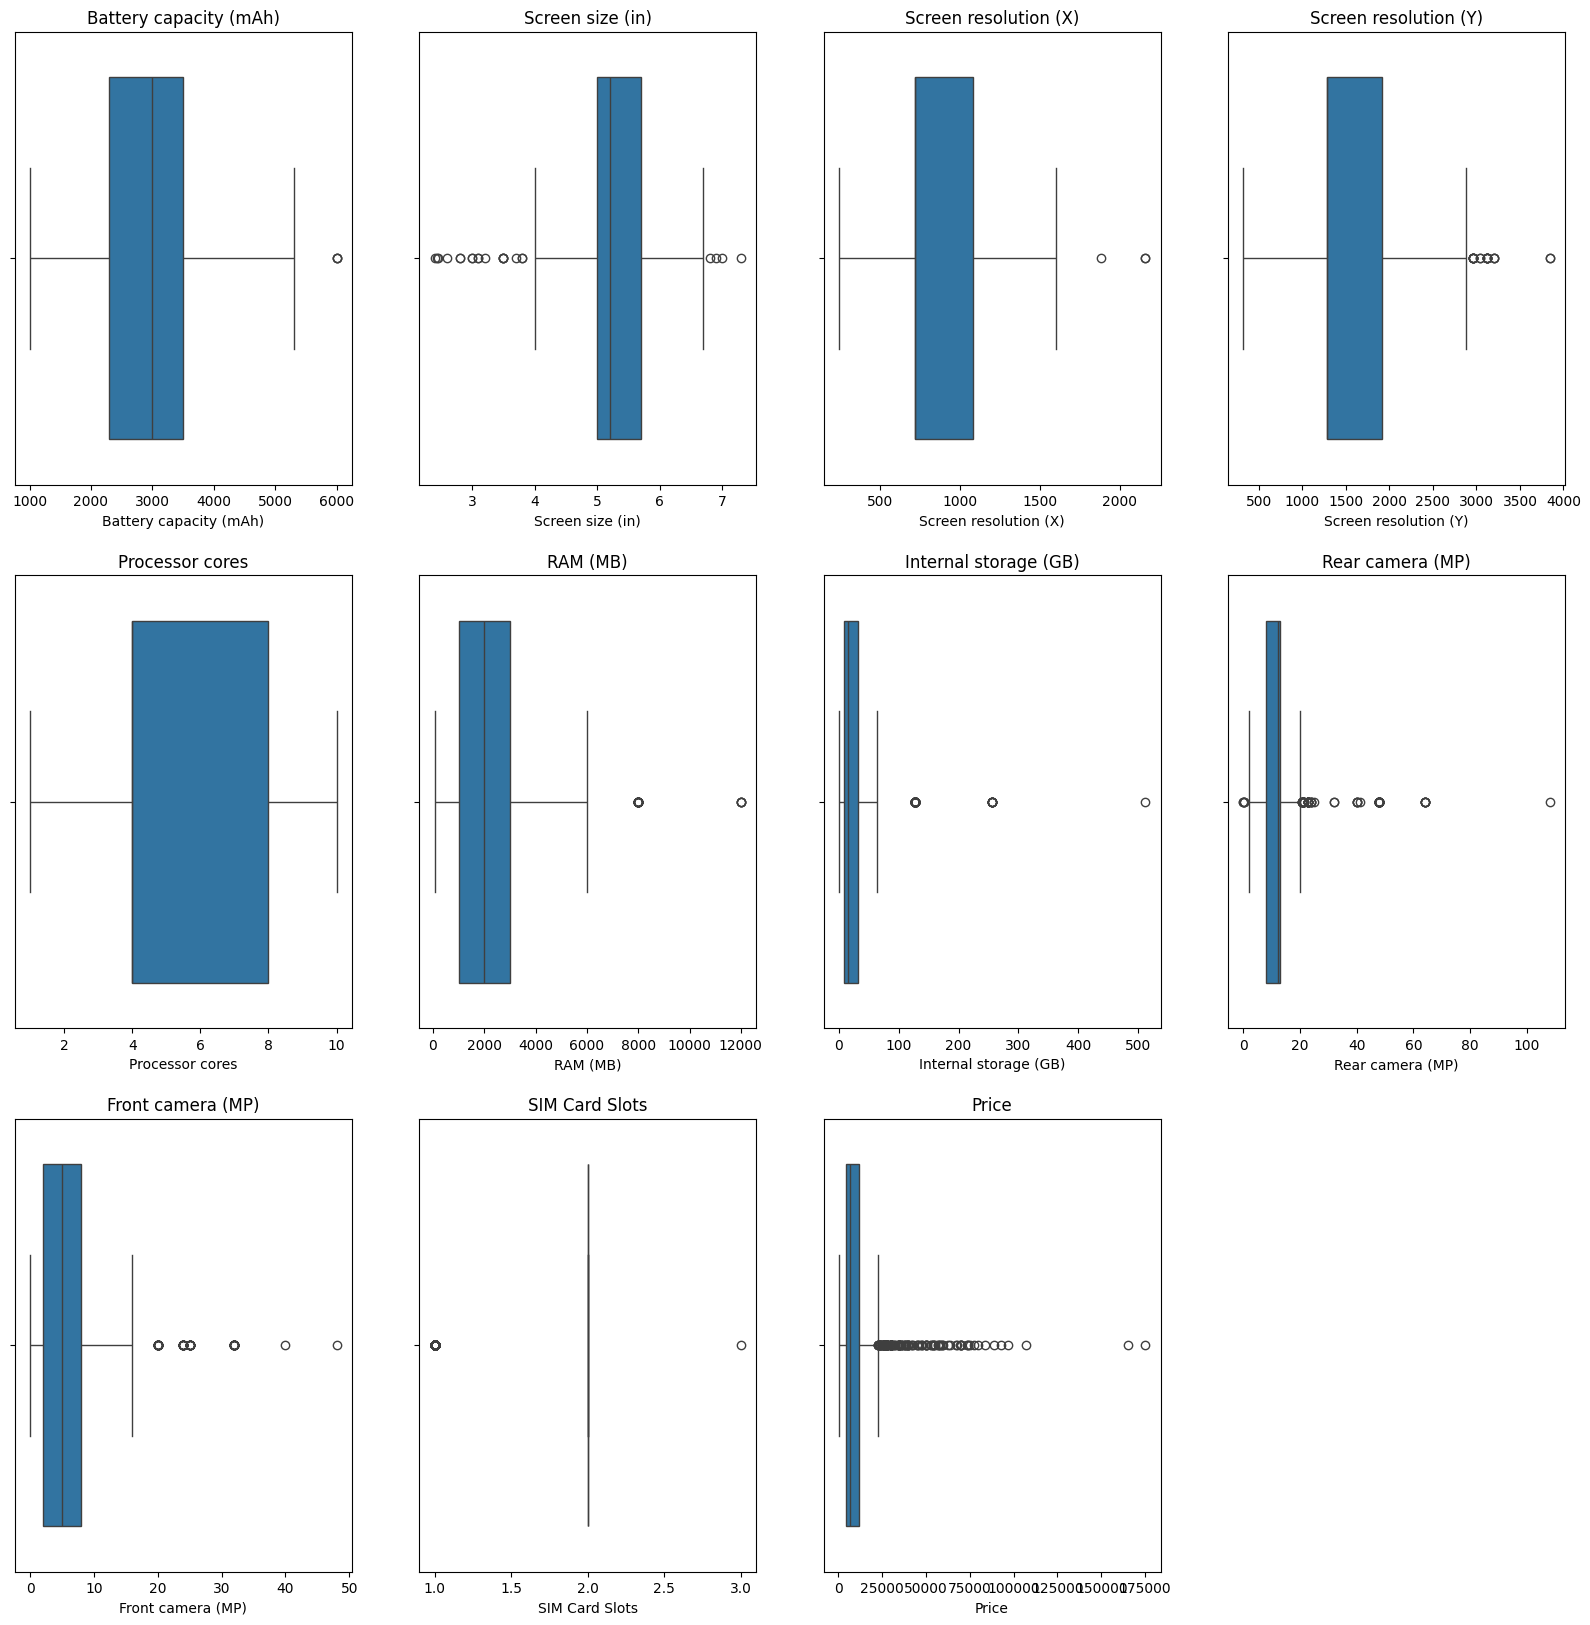

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,20))

axes = axes.flatten()

for i, column in enumerate(numericalColumns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

for i in range(len(numericalColumns), 3 * 4):
    fig.delaxes(axes[i])

plt.show()

<b>Brief insights:</b>
- As explained, `Battery capacity (mAh)`, `Screen size (in)` and `Processor cores` have distribution that is almost symmetrical, as seen on their box plots, where their whiskers are about the same on both sides of the box.
- I have also identified that `Screen size (in)`, `Internal storage (GB)`, and `Price`  have a lot of outliers at the extremes of the distribution, this can be seenas the plotted dots  in the above box plots.

### 4.2 Categorical columns analysis

#### 4.2.1 Performing descriptive statistics on categorical columns

In [14]:
for column in categoricalColumns:
    uniqueCategory = df[column].value_counts(normalize=True) * 100
    uniqueCategory3DP = uniqueCategory.round(3)
    print(f"Percentage distribution for {uniqueCategory3DP}\n")

Percentage distribution for Touchscreen display
1    98.749
0     1.251
Name: proportion, dtype: float64

Percentage distribution for Wi-Fi support
1    99.411
0     0.589
Name: proportion, dtype: float64

Percentage distribution for Bluetooth support
1    98.896
0     1.104
Name: proportion, dtype: float64

Percentage distribution for GPS support
1    92.053
0     7.947
Name: proportion, dtype: float64

Percentage distribution for 3G support
1    89.33
0    10.67
Name: proportion, dtype: float64

Percentage distribution for 4G/LTE support
1    74.467
0    25.533
Name: proportion, dtype: float64



<b> Insights: </b> <br>
<u>Touchscreen display</u> <br>
98.75% of mobile phones in the dataset have touchscreens, which is an overwhelming dominance to the 1.25% of mobile phones that rely on physical buttons.<br>
<u>Wi-Fi and Bluetooth support</u> <br>
Almost all the mobile phones in the dataset support these essential features, with 99.41% for Wi-Fi and 98.89% for Bluetooth. This suggests the importance of connectivity features in mobile phones.<br>
<u>GPS support</u> <br>
Though a high percentage of mobile phones have GPS support, 7.95% lack this navigation functionality. <br>
<u>3G and 4G/LTE support</u> <br>
3G support remains prevalent at 89.33%, but 4G/LTE is only at 74.47%. This reflects that there is actually an increasing demand for a faster mobile data speed. A quarter of the mobile phones still lack the 4G/LTE support, at 25.53%.

#### 4.2.1 Pie chart to show the percentage of distribution 

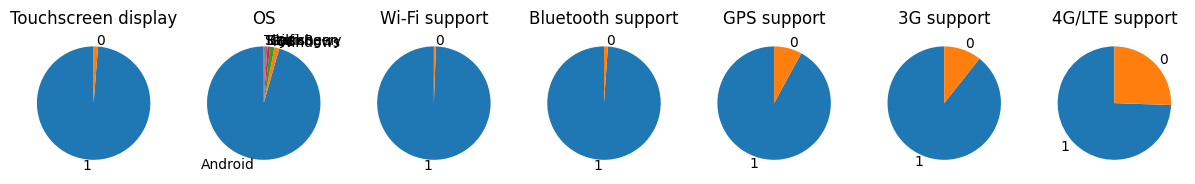

In [15]:
categoricalColumns = ['Touchscreen display', 'OS', 'Wi-Fi support', 'Bluetooth support', 'GPS support', '3G support', '4G/LTE support']
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 15))

for i, column in enumerate(categoricalColumns):
    values = df[column].value_counts()
    axes[i].pie(values, labels=values.index, startangle=90)
    axes[i].set_title(column)
for i in range(len(categoricalColumns), 1 * 7):
    fig.delaxes(axes[i])

plt.show()

<b>Brief insights:</b>
- Most of the mobile phones are touchscreen and have the functionalities Wi-Fi, Bluetooth, GPS, and 3G cellular.
- Majority of the Operating systems in the mobile phones are Android.
- 1/4 of the mobile phones do not have 4G/LTE celluar functionality.

#### 4.2.2 Box plot on mobile phone brands against the prices

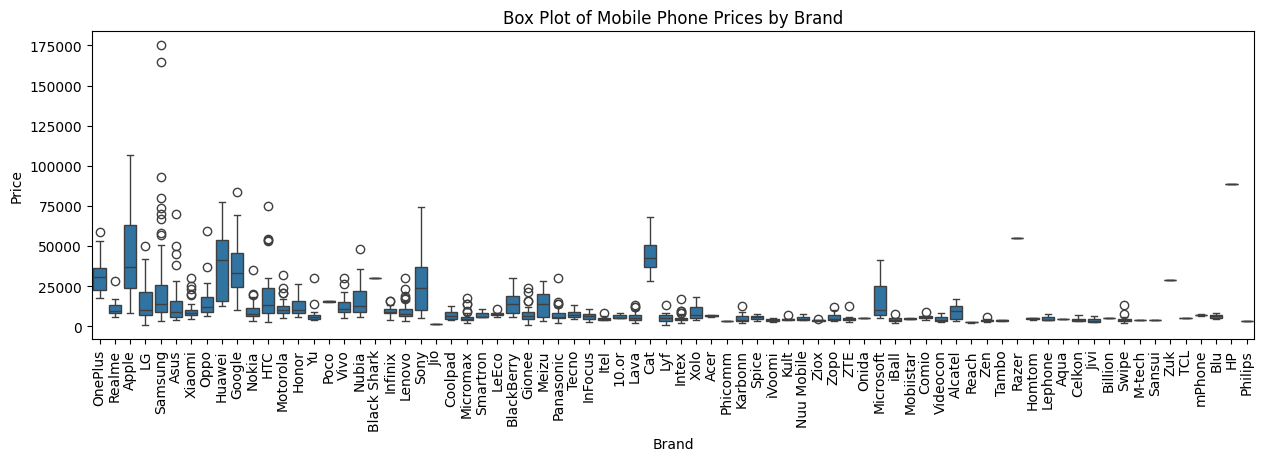

In [16]:
plt.figure(figsize=(15, 4))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title('Box Plot of Mobile Phone Prices by Brand')
plt.xticks(rotation=90)
plt.show()

<b> Insights: </b>
- Outliers are significantly present in the price distribution of brands such as Samsung, Asus, Xiaomi, Google, HTC and Motorola. This could be due to the specific high-end models they have.
- Brands such as Apple, Huawei, Google and Sony have wider IQRs, which suggests that the said brands have greater price variability. Meanwhile, the rest of the brands show narrower IQRs, which suggests more consistent pricing.

## 5. Building the Linear Regression Model

### 5.1 Importing necessary libraries

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

### 5.2 Splitting the data into training and testing sets

In [18]:
numericalDF = df[numericalColumns]
X = numericalDF.drop(['Price'], axis=1)
y = numericalDF['Price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

### 5.3 Training the Linear regression model

In [26]:
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)

LinearRegression()

### 5.4 Evaluating Linear regression model performance

In [27]:
yPreds = LRmodel.predict(X_test)

r2 = r2_score(y_test, yPreds)
mse = mean_squared_error(y_test, yPreds)
rmse = np.sqrt(mse)

print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

R-squared: 0.5004
Mean Squared Error: 106853093.79
Root Mean Squared Error: 10336.98


<b>Insights</b>  <br>
<u>Overall performance</u> <br>
- 50% of the variability in mobile phone prices can be explained by the independent features included in the Linear Regression model, which are the numerical columns. This suggests that the LR model is a moderately good fit but there is more room for improvement.
- However, there is still the other 50% of the variability in prices that are not explained by the LR model, it implies that there are other features not included in the model that may possibly contribute to determining the price of the mobile phone. <br>

<u>Error analysis</u> <br>
- A better way to interpret the MSE of 106,853,093.79, is by taking its square root value, which evaluates to 10336.98, providing a clearer picture by showing an average absolute deviation of around 10336 INR from actual prices.

Based on the above analysis, there is more room for improvement for the Linear regression model and in the following sections I will be using various approaches to improve the  model's performance. To thoroughly evaluate the model's robustness and generalizability, I will first do cross-validation, with the goal of guaranteeing that the model performs consistently across a range of data subsets. Next, I will delve into feature engineering, improving and tweaking current features and possibly creating new ones to potentially find more complex patterns in the data. After these improvements, I will conduct additional evaluations to gauge the impact on the model's ability to predict, considering various metrics and statistical analysis. The linear regression model will be improved and its predictive accuracy for the price of mobile phones will be optimized through this iterative approach.

## 6. Validation

In [28]:
cvResults = cross_val_score(LRmodel, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Cross-Validation Results:")
print("Mean Squared Error:", -cvResults.mean())
print("Root Mean Squared Error:", np.sqrt(-cvResults.mean()))
print("Standard Deviation:", cvResults.std())

Cross-Validation Results:
Mean Squared Error: 95731815.39236616
Root Mean Squared Error: 9784.263661224904
Standard Deviation: 17614690.00000067


<b>Insights:</b> <br>
- Both MSE and RMSE decrease significantly in cross-validation, suggesting closer predictions to actual prices on average, which means there is better generalization to unseen data compared to the initial LR model.
- With a standard deviation of 17,614,690.00, shows some variability in performance across different folds of the data. This may mean that the model is not stable across the folds.

<b> Possibility of overfitting </b> <br>
The initial model might be slightly overfitting the training data, and this could be seen in the cross-validation results where there is a more realistic  assessment of the model's performance.

## 7. Feature Engineering 

### 7.1 Futher analysing numerical and categorical columns

#### 7.1.1 Analyzing relationships using correlation coefficients

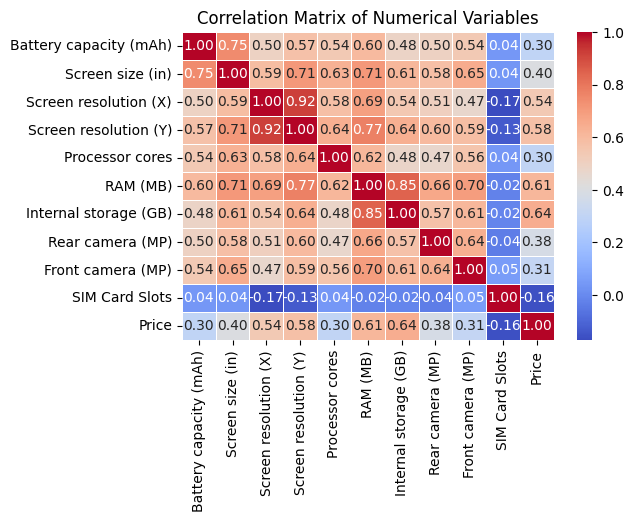

In [29]:
correlationMatrix = df[numericalColumns].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

<b> Insights: </b> <br>
<u>Strong positive correlations</u>
1. `Battery capacity (mAh)` and `Screen size (in)` have a strong positive correlation of 0.75, indicating that larger screens tend to have higher battery capacities.
2. `Screen resolution (X)` and `(Y)` have an extremely high positive correlation of 0.92 which shows that mobile phones with resolution horizontally, also have higher resolutions vertically.
3. `Internal storage` and `RAM` on the other hand show a strong positive correlation of 0.85, suggesting that mobile phones with higher internal storage capacities, are likely to have more RAM capacity.

<u>Moderate positive correlations</u> <br>
4. `Processor cores` and `RAM` have a moderate positive correlation of 0.62, which means that mobile phones with more cores may also have higher RAM capacities.
6. `Internal storage` and `Price` have moderate positive correlation, which shows that phones with more internal storage tend to be priced higher.
7. Likewise for `RAM`, it has a moderate positive correlation with `Price`, which also suggests that the more RAM capacity a mobile phone has, the higher its price would be.

<b> Other observations: </b> <br>
- `SIM Card Slots` have very weak correlations with other variables, including `Price`, indicating that the number of SIM card slots doesn't significantly influence other phone specifications or the pricing of the mobile phone.
- `Price` has moderate correlations with `Screen resolution (X)`, and `(Y)`, `RAM (MB)`, and `Internal storage (GB)`, but a weaker correlation with `Battery capacity (mAh)` and `Processor cores`, implying that factors like screen quality, memory, and storage may impact price more directly than battery size or processing power.

#### 7.1.2 Considering other categorical columns

Using Chi-square test, I will evaluate the association of the target variable `Price` with the categorical columns, along with `Model` and `Brand`.

In [30]:
from scipy.stats import chi2_contingency
newCategoricalColumns = ['Model', 'Brand', 'Touchscreen display', 'OS', 'Wi-Fi support', 'Bluetooth support', 'GPS support', '3G support', '4G/LTE support']

for column in newCategoricalColumns:
    cross_tab = pd.crosstab(df[column], df['Price'])
    chi2, p, _, _ = chi2_contingency(cross_tab)
    
    print(f"Chi-Square Test between {column} and Price:")
    print(f"Chi-Square Value: {chi2}")
    print(f"P-value: {p}\n")

Chi-Square Test between Model and Price:
Chi-Square Value: 829364.5443623042
P-value: 0.0089932298396882

Chi-Square Test between Brand and Price:
Chi-Square Value: 51406.455912205485
P-value: 1.670886963194523e-45

Chi-Square Test between Touchscreen display and Price:
Chi-Square Value: 569.1056388573086
P-value: 0.9495401033814753

Chi-Square Test between OS and Price:
Chi-Square Value: 3143.300494547331
P-value: 0.9999999999999648

Chi-Square Test between Wi-Fi support and Price:
Chi-Square Value: 757.7839577165064
P-value: 0.00022434473160156643

Chi-Square Test between Bluetooth support and Price:
Chi-Square Value: 529.4531732737128
P-value: 0.9979077397277967

Chi-Square Test between GPS support and Price:
Chi-Square Value: 692.0542057859226
P-value: 0.0341069658673547

Chi-Square Test between 3G support and Price:
Chi-Square Value: 638.0538463367182
P-value: 0.3604290967068237

Chi-Square Test between 4G/LTE support and Price:
Chi-Square Value: 699.8108712039398
P-value: 0.02128

<b> Insights: </b> <br>
<u>Significant associations:</u> <br>
- `Model` and `Price` have a significant association with a P-value of 0.0089, indicating that mobile phones of certain model have different price distribution.
- `Brand` and `Price` also have a strong relationship, with prices varying significantly among the different mobile phone brands.
- `Wi-Fi support` and `Price` have a significant association with a P-value of 0.0002, suggesting that mobile phones with and without Wi-Fi support have different price distributions. Its absence might be associated with lower-priced phones.
- `GPS support` and `Price` also have a significant association with a P-value of 0.03410, indicating that mobile phones with and without GPS support tend to have different price distributions. Its absence might be associated with lower-priced mobile phones.
- `4G/LTE support` and `Price` also shows a significant association with a P-value of  0.02128, suggesting that mobile phones with and without 4G/LTE support have different price distribution <br>

<u>No significant associations:</u> <br>
`Touchscreen display`, `Bluetooth support`, and `3G support` do not have significant associations with the `Price`. This implies that their presence or absence doesn't significantly impact price distribution in this dataset.

#### Summary
Columns to drop for numerical category
- `Battery capacity (mAh)` 
- `Processor cores`
- `SIM Card Slots`
<br>

Columns to drop for categorical columns
- `Touchscreen display`
- `Bluetooth support`
- `3G support` 

### 7.2 Implementing label encoding

In [34]:
colummsToDrop = ['Name', 'Battery capacity (mAh)', 'Touchscreen display', 'Processor cores', 'Bluetooth support', 'SIM Card Slots', '3G support']
df1 = df.copy()
df1 = df1.drop(colummsToDrop,axis=1)

In [35]:
from sklearn.preprocessing import LabelEncoder

columnsToEncode = ['Brand', 'Model', 'OS']

labelEncoder = LabelEncoder()

for column in columnsToEncode:
    df1[column] = labelEncoder.fit_transform(df1[column])

print(df1.head())

   Brand  Model  Screen size (in)  Screen resolution (X)  \
0     44     49              6.67                   1440   
1     53   1142              6.50                   1080   
2      3   1288              6.50                   1242   
3      3   1286              6.10                    828   
4     29    522              6.40                   1080   

   Screen resolution (Y)  RAM (MB)  Internal storage (GB)  Rear camera (MP)  \
0                   3120     12000                  256.0              48.0   
1                   2400      6000                   64.0              64.0   
2                   2688      4000                   64.0              12.0   
3                   1792      4000                   64.0              12.0   
4                   2340      6000                  128.0              12.0   

   Front camera (MP)  OS  Wi-Fi support  GPS support  4G/LTE support   Price  
0               16.0   0              1            1               1   58998  
1     

### 7.3 Retraining the model and performing evaluation

In [36]:
X = df1.drop(['Price'], axis=1)
y = df1['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

newLRmodel = LinearRegression()
newLRmodel.fit(X_train, y_train)

newYPreds = newLRmodel.predict(X_test)

r2 = r2_score(y_test, newYPreds)
mse = mean_squared_error(y_test, newYPreds)
rmse = np.sqrt(mse)

print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

R-squared: 0.6337
Mean Squared Error: 96540894.19
Root Mean Squared Error: 9825.52


<b>Insights:</b> <br>
<u>Initial vs. Final Results</u>
- The final LR model explains a greater proportion of price variance (63.37%) after feature engineering, which suggests a stronger relationship between the features and price.
- There was a slight decrease in MSE, 96,540,894.19 and slight increase in RMSE 9825.52, which indicates a trade-off between these metrics.
- There was a positive impact of feature engineering, by dropping irrelevant or redundant features, it improved the model fit and predictive ability. <br>

<u>Cross-Validation Results vs Final Results</u>
- The final model's performance of having an MSE of 96,540,894.19, and a RMSE: 9825.52 aligns closely with cross-validation results of 95,731,815.39 and 9784.26, MSE and RMSE respectively, suggesting good generalization to unseen data.
-  I also observed reduced overfitting, as the final model's performance on training data is more consistent with its performance on unseen data. <br>

<u>Final Results</u>
- Feature engineering has positively impacted model performance by removing irrelevant features.
- Cross-validation is important for assessing generalization and avoiding optimistic performance estimates.
- The final model strikes a good balance between fit and generalization, with R-squared of 0.6337 and RM. 9825.52.

## 8. Evaluation of the Project

### 8.1 Key findings and contributions

This project aimed to predict mobile phone prices based on various features, contributing insights into the factors influencing pricing. The key findings include the impact of feature engineering on model performance, resulting in an improved R-squared value (0.6337) and reduced Root Mean Squared Error (9825.52). The exploration of cross-validation further strengthens the model's generalizability.

### 8.2 Performance evaluation

To evaluate the accuracy of the model, numerical metrics like Root Mean Squared Error and R-squared were used. Comparing the final model to the initial version, there was a significant improvement in its predictive capabilities. The reliability of the model was strengthened by cross-validation results, which validated consistent performance across several data subsets.

### 8.3 Limitations and future improvements

Despite the improvements in the model, limitations still persist. Changes in market dynamics or unobserved variables may have an impact on the model's predictive capability. Future work could explore more advanced regression techniques or additional feature engineering. Furthermore, gathering a wider range of data over time may improve the model's flexibility.

In conclusion, this project offers a moderately strong predictive model, in addition to enhancing my knowledge on the dynamics of mobile phone pricing. To remain relevant in the ever-changing mobile phone market, the model will require constant improvement and adjustments.

## 9. References

Garai, P. (2022, August 14). Mobile phone specifications and prices. Kaggle. <br>
https://www.kaggle.com/datasets/pratikgarai/mobile-phone-specifications-and-prices/data 

Pandas.DataFrame.map#. pandas.DataFrame.map - pandas 2.1.4 documentation. (n.d.). <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html 

GeeksforGeeks. (2023, August 23). Python: Pandas.map(). GeeksforGeeks. <br>
https://www.geeksforgeeks.org/python-pandas-map/ 

Dan, A. (2020, September 16). Kurtosis() & skew() function in pandas. Medium. <br>
https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de 

Pandas.dataframe.kurtosis#. pandas.DataFrame.kurtosis - pandas 2.1.4 documentation. (n.d.). <br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurtosis.html 

GeeksforGeeks. (2022, March 8). Box plot in python using Matplotlib. GeeksforGeeks.  <br>
https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/ 

GeeksforGeeks. (2020, April 21). Matplotlib.pyplot.delaxes() in Python. GeeksforGeeks.  <br>
https://www.geeksforgeeks.org/matplotlib-pyplot-delaxes-in-python/ 

Matplotlib.pyplot.subplots#. matplotlib.pyplot.subplots - Matplotlib 3.8.2 documentation. (n.d.).  <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html 

Matplotlib pie charts. (n.d.). <br>
https://www.w3schools.com/python/matplotlib_pie_charts.asp 


Pandas series: Value_counts() function. w3resource. (n.d.). <br>
https://www.w3resource.com/pandas/series/series-value_counts.php 


Pramoditha, R. (2022, May 2). Why do we set a random state in machine learning models?. Medium.  <br>
https://towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431 

Wu, S. (2021, June 5). What are the best metrics to evaluate your regression model?. Medium.  <br>
https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b 

Mali, K. (2023, November 27). Everything you need to know about linear regression!. Analytics Vidhya. <br>
https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/ 

Chaudhary, M. (2020, July 31). Evaluation of linear regression model. Medium.  <br>
https://medium.com/@cmukesh8688/evaluation-of-linear-regression-model-6e8edbb068f 

3.1. cross-validation: Evaluating estimator performance. scikit. (n.d.). <br>
https://scikit-learn.org/stable/modules/cross_validation.html 


Junaid Qazi, P. (2022, January 7). A25: Linear Regression (part-4) hands-on >> cross-validation, Readings & Resources, R-square vs... Medium.  <br>
https://python.plainenglish.io/a25-linear-regression-part-4-hands-on-cross-validation-readings-resources-r-square-vs-bed1b79dabab 

GeeksforGeeks. (2022b, August 26). Plotting correlation matrix using Python. GeeksforGeeks.  <br>
https://www.geeksforgeeks.org/plotting-correlation-matrix-using-python/ 

Chi-Square. Python for Data Science. (2018, April 16).  <br>
https://pythonfordatascienceorg.wordpress.com/chi-square-python/ 

Pipis, G. (2021, October 22). How to run the chi-square test in Python. Medium.  <br>
https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d 

Scipy.stats.chisquare#. scipy.stats.chisquare - SciPy v1.11.4 Manual. (n.d.).  <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html 

Pandas.crosstab#. pandas.crosstab - pandas 2.1.4 documentation. (n.d.).  <br>
https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html 

GeeksforGeeks. (2023a, April 18). Label encoding in Python. GeeksforGeeks.  <br>
https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/ 

Sklearn.preprocessing.LabelEncoder. scikit. (n.d.-b).  <br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html 